<a href="https://colab.research.google.com/github/JonPaulBIlbao/Machine-Learning-in-Finance-Python-2026/blob/main/01.%20Logistic%20Regression/01_Intro_Odds_Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Finance**
**Deusto Business School**

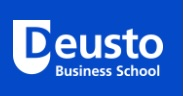

ADE + FAB

---

# Logistic Regression I – Odds, Logit, and a First Mini Churn Example

In this notebook we introduce the core ideas behind **logistic regression**:

- Probability vs **odds**
- **Log-odds (logit)**
- The **logistic function** (from logit back to probability)
- A **tiny churn example** with a synthetic dataset

The goal is that you feel completely comfortable with **odds and logit**
*before* we start fitting logistic regression models on the real **USA Telecom**
churn dataset in the next sessions.



## 1. Learning goals

By the end of this notebook you should be able to:

1. Compute **probability**, **odds** and **logit** for a binary event.
2. Understand how odds behave as probability increases.
3. Understand why logit is a convenient scale for logistic regression.
4. Use simple Python code to create tables and plots of these transformations.
5. Interpret odds and logit in a **business context** (default / churn).



## 2. Setup – importing Python libraries

We will use:

- **NumPy** for numerical computations.
- **pandas** for working with tables (data frames).
- **Matplotlib** for visualizations.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Slightly larger default size and grid for better readability
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

print("Libraries loaded successfully.")


Libraries loaded successfully.


## 3. A motivating example: loan default

Imagine a bank wants to model the **probability that a customer will default**
on a loan in the next year.

For one specific customer the risk department estimates:

- Probability of default:  \\( p = 0.20 \\) (20% chance of default).

We want to answer:

1. What are the **odds** of default?
2. What is the corresponding **logit** (log-odds)?
3. How do these values compare for different probabilities?



In [ ]:
# Example: three customers with different probabilities of default
p_values = np.array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

# Recall: odds = p / (1 - p)
odds_values = p_values / (1 - p_values)

# Recall: logit = log(odds)
logit_values = np.log(odds_values)

example_table = pd.DataFrame({
    "p (probability of default)": p_values,
    "odds": odds_values,
    "logit": logit_values
})

example_table


,p (probability of default),odds,logit
0,0.2,0.250000,-1.386294
1,0.3,0.428571,-0.847298
2,0.4,0.666667,-0.405465
3,0.5,1.000000,0.000000
4,0.6,1.500000,0.405465
5,0.7,2.333333,0.847298
6,0.8,4.000000,1.386294


Observe the symmetry:

- When \\( p = 0.2 \\), the logit is negative.
- When \\( p = 0.8 \\), the logit has the **same magnitude but positive sign**.
- When \\( p = 0.5 \\), odds = 1 and logit = 0.

This symmetry around \\( p = 0.5 \\) is one reason why working with logits is convenient.



## 4. From probability to odds and logit

For a binary event (e.g. **default** vs **no default**, or **churn** vs **stay**):

For a binary event (e.g. **default** vs **no default**, or **churn** vs **stay**):

- Let \( p \) be the **probability** of the event.
- Then \( 1 - p \) is the probability of **not** having the event.



We define:

### • Odds of the event

$$
\text{odds} = \frac{p}{1 - p}
$$

### • Logit (log-odds)

$$
\text{logit}(p) = \log\left( \frac{p}{1 - p} \right)
$$

Below we write two small helper functions to move between these quantities.

In [ ]:
def prob_to_odds_logit(p):
    """
    Given a probability p (between 0 and 1), return odds and logit.

    Parameters
    ----------
    p : float or array-like
        Probability of the event (0 < p < 1).

    Returns
    -------
    odds : float or array-like
        Odds = p / (1 - p)
    logit : float or array-like
        Logit = log(odds)
    """
    odds = p / (1 - p)
    logit = np.log(odds)
    return odds, logit


def logit_to_prob(z):
    """
    Given a logit z, return the corresponding probability using the logistic function.

    Parameters
    ----------
    z : float or array-like
        Logit value (can be any real number).

    Returns
    -------
    p : float or array-like
        Probability between 0 and 1.
    """
    p = 1 / (1 + np.exp(-z))
    return p


# Quick check with a single value
p_example = 0.3
odds_example, logit_example = prob_to_odds_logit(p_example)
print(f"For p = {p_example}: odds = {odds_example:.3f}, logit = {logit_example:.3f}")


For p = 0.3: odds = 0.429, logit = -0.847


## 5. Creating a full table of p, odds and logit

Now we:

1. Create a sequence of probabilities from 0.01 to 0.99.
2. Compute the corresponding odds and logits.
3. Store everything in a pandas DataFrame.

We avoid exactly 0 and 1 because odds and logit would become infinite there.



In [ ]:
# 1. Sequence of probabilities from 0.01 to 0.99
p = np.arange(0.01, 1.00, 0.01)

# 2. Compute odds and logit using our helper function
odds, logit = prob_to_odds_logit(p)

# 3. Create a DataFrame
table = pd.DataFrame({
    "p": p,
    "odds": odds,
    "logit": logit
})

table.head(10)


,p,odds,logit
0,0.01,0.010101,-4.595120
1,0.02,0.020408,-3.891820
2,0.03,0.030928,-3.476099
3,0.04,0.041667,-3.178054
4,0.05,0.052632,-2.944439
5,0.06,0.063830,-2.751535
6,0.07,0.075269,-2.586689
7,0.08,0.086957,-2.442347
8,0.09,0.098901,-2.313635
9,0.10,0.111111,-2.197225


In [ ]:
# Summary statistics of p, odds and logit
table.describe()


,p,odds,logit
count,99.000000,99.000000,9.900000e+01
mean,0.500000,4.229674,1.435440e-16
std,0.287228,11.798149,1.710892e+00
min,0.010000,0.010101,-4.595120e+00
25%,0.255000,0.342342,-1.072290e+00
50%,0.500000,1.000000,0.000000e+00
75%,0.745000,2.923077,1.072290e+00
max,0.990000,99.000000,4.595120e+00


In [ ]:
# Select some specific probabilities as reference points
selected_p = [0.1, 0.2, 0.5, 0.8, 0.9]
mask = table["p"].isin(selected_p)

table[mask]


,p,odds,logit
19,0.2,0.25,-1.386294
49,0.5,1.00,0.000000
79,0.8,4.00,1.386294
89,0.9,9.00,2.197225


These values are useful to remember when interpreting logistic regression models.
For example, odds = 4 corresponds to a probability of 0.8 (4 times more likely to happen than not).


## 6. Plotting odds as a function of probability

We now visualize how **odds** change as **probability** increases.

- Odds are small when \\( p \\) is close to 0.
- Odds grow very fast when \\( p \\) is close to 1.

We also highlight some reference probabilities.



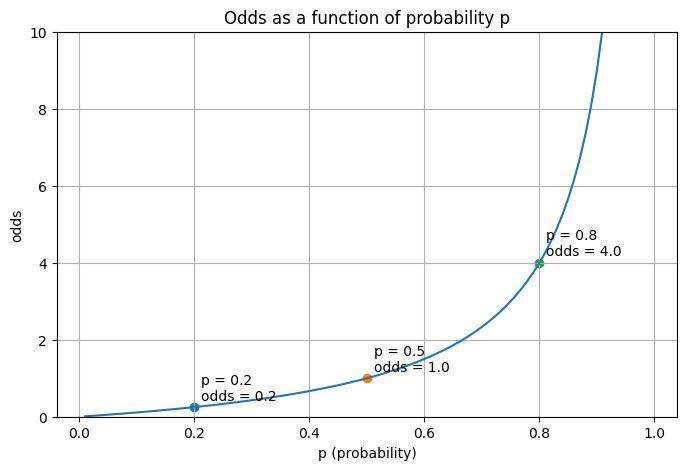

In [ ]:
fig, ax = plt.subplots()

ax.plot(table["p"], table["odds"], label="odds = p / (1 - p)")

# Limit the y-axis to focus on a useful range for interpretation
ax.set_ylim(0, 10)

ax.set_xlabel("p (probability)")
ax.set_ylabel("odds")
ax.set_title("Odds as a function of probability p")

# Highlight some reference points
ref_ps = [0.2, 0.5, 0.8]
for rp in ref_ps:
    rodds, _ = prob_to_odds_logit(rp)
    ax.scatter([rp], [rodds])
    ax.annotate(f"p = {rp}\nodds = {rodds:.1f}",
                (rp, rodds),
                textcoords="offset points",
                xytext=(5, 5))

plt.show()


**Interpretation**

- When \\( p = 0.5 \\), odds = 1 (both outcomes are equally likely).
- When \\( p = 0.8 \\), odds = 4 (event is 4 times more likely than not).
- As \\( p \\) approaches 1, odds grow very quickly (non-linear behaviour).

This non-linearity is one reason why we move to **log-odds (logit)**.



## 7. Plotting logit as a function of probability

Now we plot the **logit** versus **p**.

Recall:

\\[ \text{logit}(p) = \log\left( \frac{p}{1 - p} \right) \\]

- logit is **negative** when \\( p < 0.5 \\)
- logit is **0** when \\( p = 0.5 \\)
- logit is **positive** when \\( p > 0.5 \\)



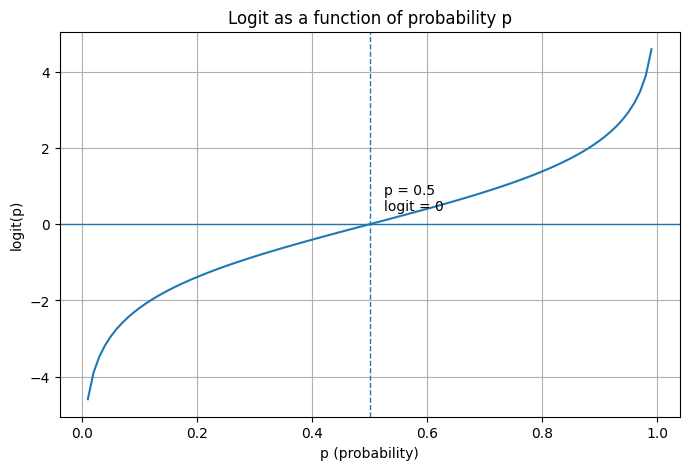

In [ ]:
fig, ax = plt.subplots()

ax.plot(table["p"], table["logit"], label="logit(p)")

ax.set_xlabel("p (probability)")
ax.set_ylabel("logit(p)")
ax.set_title("Logit as a function of probability p")

# Horizontal line at logit = 0
ax.axhline(0, linewidth=1)

# Vertical line at p = 0.5
ax.axvline(0.5, linestyle="--", linewidth=1)

# Annotate central point
ax.annotate("p = 0.5\nlogit = 0",
            (0.5, 0),
            textcoords="offset points",
            xytext=(10, 10))

plt.show()


### Why logistic regression uses logit

Logistic regression assumes that the **logit of the probability** is a **linear function** of the predictors:

\\[ \text{logit}(p) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_k x_k \\]

This has several advantages:

- On the **logit scale**, the relationship is linear.
- Coefficients \\( \beta_j \\) are interpretable in terms of **changes in log-odds** and **odds ratios**.
- Then we use the **logistic function** to go back from logit to probability.



## 8. From logit back to probability: the logistic function

If we call the logit value \\( z \\), we recover the probability \\( p \\) with the **logistic function**:

\\[ p = \frac{1}{1 + e^{-z}} \\]

This S-shaped curve maps any real value (from \\( -\infty \\) to \\( +\infty \\)) into a probability between 0 and 1.



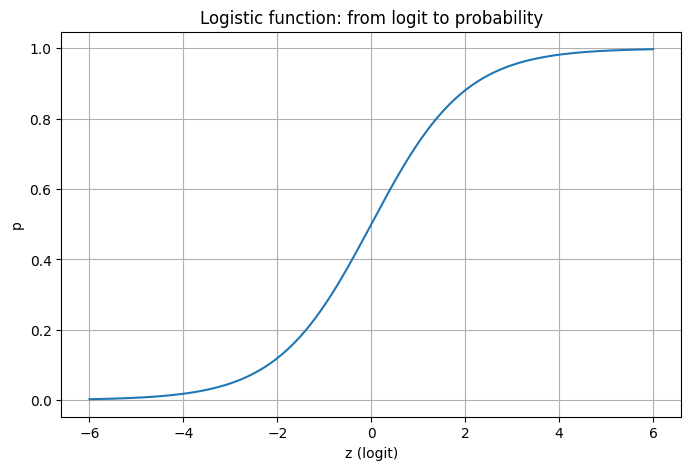

In [ ]:
# Range of logit (z) values
z = np.linspace(-6, 6, 200)
p_from_z = logit_to_prob(z)

fig, ax = plt.subplots()

ax.plot(z, p_from_z)

ax.set_xlabel("z (logit)")
ax.set_ylabel("p")
ax.set_title("Logistic function: from logit to probability")

plt.show()


This is the curve that logistic regression uses to convert the **linear predictor**

\\[ z = \beta_0 + \beta_1 x_1 + \cdots + \beta_k x_k \\]

back into a **probability** between 0 and 1.



## 9. Mini churn example with a synthetic dataset

Now we build a tiny, **synthetic** telecom dataset with 12 customers.

For each customer we specify:

- `customer_id`
- `tenure_months` (how long they have been a customer)
- `monthly_charge` (approximate bill)
- `is_promo` (whether they are on a promotional plan)
- `p_churn` (a *hypothetical* estimated probability of churn)

We will then compute **odds** and **logit** of churn and see how these help us
interpret risk levels.



In [ ]:
# Create a tiny synthetic churn dataset
mini_churn = pd.DataFrame({
    "customer_id": range(1, 13),
    "tenure_months": [2, 5, 12, 3, 24, 18, 8, 30, 10, 4, 36, 20],
    "monthly_charge": [80, 60, 55, 90, 40, 45, 70, 35, 65, 85, 30, 50],
    "is_promo": [1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    # Hypothetical predicted probabilities of churn (just made up)
    "p_churn": [0.65, 0.40, 0.15, 0.70, 0.10, 0.18, 0.55, 0.08, 0.45, 0.72, 0.05, 0.25]
})

mini_churn


,customer_id,tenure_months,monthly_charge,is_promo,p_churn
0,1,2,80,1,0.65
1,2,5,60,1,0.40
2,3,12,55,0,0.15
3,4,3,90,1,0.70
4,5,24,40,0,0.10
5,6,18,45,0,0.18
6,7,8,70,1,0.55
7,8,30,35,0,0.08
8,9,10,65,1,0.45
9,10,4,85,1,0.72


In [ ]:
# Compute odds and logit of churn for each customer
mini_churn["odds_churn"], mini_churn["logit_churn"] = prob_to_odds_logit(mini_churn["p_churn"])

mini_churn


,customer_id,tenure_months,monthly_charge,is_promo,p_churn,odds_churn,logit_churn
0,1,2,80,1,0.65,1.857143,0.619039
1,2,5,60,1,0.40,0.666667,-0.405465
2,3,12,55,0,0.15,0.176471,-1.734601
3,4,3,90,1,0.70,2.333333,0.847298
4,5,24,40,0,0.10,0.111111,-2.197225
5,6,18,45,0,0.18,0.219512,-1.516347
6,7,8,70,1,0.55,1.222222,0.200671
7,8,30,35,0,0.08,0.086957,-2.442347
8,9,10,65,1,0.45,0.818182,-0.200671
9,10,4,85,1,0.72,2.571429,0.944462


In [ ]:
# Sort customers from highest to lowest churn probability
mini_churn_sorted = mini_churn.sort_values(by="p_churn", ascending=False)
mini_churn_sorted


,customer_id,tenure_months,monthly_charge,is_promo,p_churn,odds_churn,logit_churn
9,10,4,85,1,0.72,2.571429,0.944462
3,4,3,90,1,0.70,2.333333,0.847298
0,1,2,80,1,0.65,1.857143,0.619039
6,7,8,70,1,0.55,1.222222,0.200671
8,9,10,65,1,0.45,0.818182,-0.200671
1,2,5,60,1,0.40,0.666667,-0.405465
11,12,20,50,0,0.25,0.333333,-1.098612
5,6,18,45,0,0.18,0.219512,-1.516347
2,3,12,55,0,0.15,0.176471,-1.734601
4,5,24,40,0,0.10,0.111111,-2.197225


Look at the customers with highest churn probability:

- As probability approaches 1, odds and logit values become very large.
- Differences in logit are more "linear" than differences in probability.

This is exactly what logistic regression exploits: it models **logit(p_churn)** as a linear
combination of predictors such as `tenure_months`, `monthly_charge`, and `is_promo`.



## 10. Common mistakes

Some typical confusions:

1. **Confusing probability and odds**:
   - A probability of 0.8 is **not** "odds = 0.8".
   - The odds in that case are \\( 0.8 / 0.2 = 4 \\).

2. **Forgetting that odds can be greater than 1**:
   - Odds are not bounded by 1; they can go from 0 to \\( +\infty \\).

3. **Confusing logit with probability**:
   - A logit of 0 means probability 0.5, not 0.
   - Logit values are not probabilities; they are on the real line.

4. **Using p = 0 or p = 1 directly in logit**:
   - For p = 0 or p = 1 the odds and logit are undefined (division by zero or log of zero).



## 11. Exercises

Try to answer the following questions. You can use Python or do the calculations by hand.

### Exercise 1 – Loan default

A customer has probability of default \\( p = 0.3 \\).

1. Compute the odds of default.
2. Compute the logit of default.
3. Interpret the odds in everyday language ("x times more likely to default than not").

### Exercise 2 – Logit to probability

Another customer has logit (\\( z \\)) of default equal to 1.1.

1. Use the logistic function to compute the corresponding probability of default.
2. Is this customer more or less risky than a customer with logit = 0? Why?

### Exercise 3 – Churn odds

In a churn model, the odds of churn for a segment of customers are estimated as 2.5.

1. What is the corresponding probability of churn?
2. What is the logit value?

You can use the code cell below to check your answers.



In [ ]:
# Use this cell to check your answers to the exercises

# Example for Exercise 1
p1 = 0.3
odds1, logit1 = prob_to_odds_logit(p1)
print("Exercise 1")
print(f"p = {p1}, odds = {odds1:.3f}, logit = {logit1:.3f}\n")

# Example for Exercise 2
z2 = 1.1
p2 = logit_to_prob(z2)
print("Exercise 2")
print(f"z = {z2}, p = {p2:.3f}\n")

# Example for Exercise 3
odds3 = 2.5
# Work backwards: odds = p / (1 - p)  ->  p = odds / (1 + odds)
p3 = odds3 / (1 + odds3)
logit3 = np.log(odds3)
print("Exercise 3")
print(f"odds = {odds3}, p = {p3:.3f}, logit = {logit3:.3f}")


Exercise 1
p = 0.3, odds = 0.429, logit = -0.847

Exercise 2
z = 1.1, p = 0.750

Exercise 3
odds = 2.5, p = 0.714, logit = 0.916


## 12. Next steps – connecting to the USA Telecom churn dataset

In the next notebooks we will:

1. Load and explore the **USA Telecom churn dataset**.

2. Fit a first **logistic regression model** where the target is churn (yes/no).

3. Interpret model coefficients in terms of **log-odds** and **odds ratios**.

4. Convert predictions (logits) into **probabilities of churn** using the logistic function.

5. Evaluate the model using metrics such as **accuracy**, **precision**, **recall** and **ROC curves**.

This notebook gives you the mathematical and graphical intuition needed to
understand what logistic regression is doing "under the hood".

